In [1]:
#!pip install antspyx

In [2]:
from ants import image_read, image_write, resample_image_to_target, registration, ANTsImage
import os

In [3]:
data_path = "../../../data/csc4801/WangLab/"
atlas_filename = data_path + "atlas_reference/HCP40_MNI_1.25mm.nii"
scan_dir = data_path + "skull_stripped_scans/"
out_dir = data_path + "atlas_registered_scans/"

In [4]:
sample_scan_dir = data_path + "skull-stripping-output-samples/"

In [5]:
atlas = image_read(atlas_filename)

In [8]:
# load atlas image as ANTsImage
atlas = image_read(atlas_filename)

for scan_name in os.listdir(sample_scan_dir):
    scan_path = os.path.join(sample_scan_dir, scan_name)
    # checking if it is a file
    if os.path.isfile(scan_path):
        # load moving image as ANTsImage
        mi = image_read(scan_path)

        # resize moving image to atlas space
        mi_resampled = resample_image_to_target(image=mi, target=atlas)

        # register moving image to atlas image
        registered = registration(fixed=atlas, moving=mi_resampled, type_of_transform="SyN")

        # access values from dict
        mi_registered = registered["warpedmovout"]
        # do we ever use these transforms or vtransforms?
        #transforms = registration["fwdtransforms"]
        #vtransforms = registration["invtransforms"]

        # write registered image to file
        #mi_registered.to_file(out_filename)
        # another option would be to use ants.image_write()
        out_filename = out_dir + scan_name
        f = open(out_filename, "a")
        image_write(mi_registered, out_filename)

In [9]:
from ants import plot

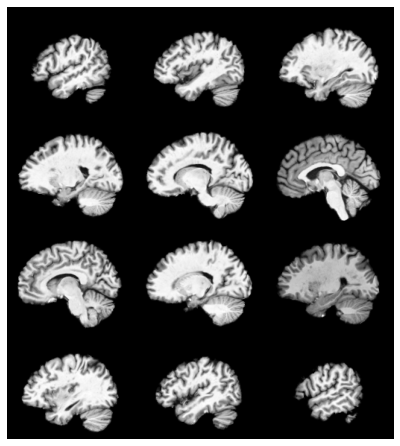

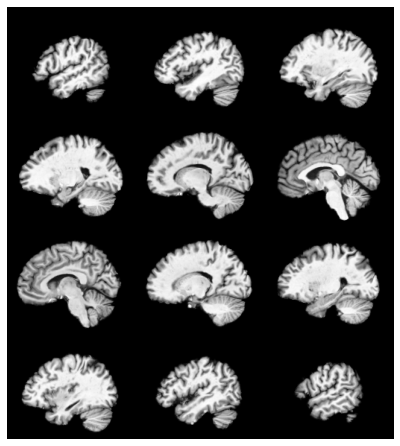

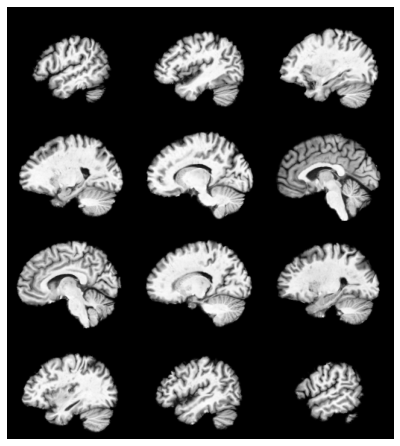

In [10]:
for scan_name in os.listdir(out_dir):
    scan_path = os.path.join(out_dir, scan_name)
    
    if os.path.isfile(scan_path):
        image = image_read(scan_path)
        plot(image)